# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [6]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('mental_health_diagnosis_treatment_data.csv')

Preprocess the input and the output variables appropriately.

In [8]:
# Write your code here. Add as many boxes as you need.
data.sample(10)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
127,128,53.0,Male,Major Depressive Disorder,5,3,8,5.0,Antipsychotics,Cognitive Behavioral Therapy,2024-04-03,9,8.0,No Change,7,Depressed,71
126,127,47.0,Female,Bipolar Disorder,10,4,9,6.0,Antipsychotics,Interpersonal Therapy,2024-01-28,11,5.0,No Change,5,Neutral,65
494,495,19.0,Male,Major Depressive Disorder,8,5,5,2.0,SSRIs,Dialectical Behavioral Therapy,2024-02-05,14,NaN,Improved,10,Stressed,70
267,268,52.0,Female,Panic Disorder,8,6,4,3.0,Anxiolytics,Cognitive Behavioral Therapy,2024-04-09,13,10.0,Improved,9,Happy,77
35,36,53.0,Male,Bipolar Disorder,10,6,5,7.0,Mood Stabilizers,Cognitive Behavioral Therapy,2024-01-08,11,9.0,Deteriorated,7,Depressed,68
421,422,20.0,Female,Major Depressive Disorder,10,8,4,4.0,Antipsychotics,Interpersonal Therapy,2024-03-09,8,7.0,No Change,8,Anxious,83
410,411,51.0,Female,Major Depressive Disorder,9,5,8,1.0,Antidepressants,Cognitive Behavioral Therapy,2024-03-27,10,NaN,Deteriorated,6,Depressed,66
220,221,40.0,Male,Generalized Anxiety,5,3,7,4.0,Mood Stabilizers,Interpersonal Therapy,2024-01-21,9,8.0,Improved,9,Anxious,65
210,211,46.0,Female,Bipolar Disorder,6,5,7,8.0,SSRIs,Cognitive Behavioral Therapy,2024-03-24,14,9.0,No Change,8,Anxious,82
57,58,31.0,Male,Major Depressive Disorder,6,5,4,5.0,Antidepressants,Interpersonal Therapy,2024-02-11,10,7.0,No Change,7,Stressed,83


Explore the dataset using visualizations of your choice.

<Axes: >

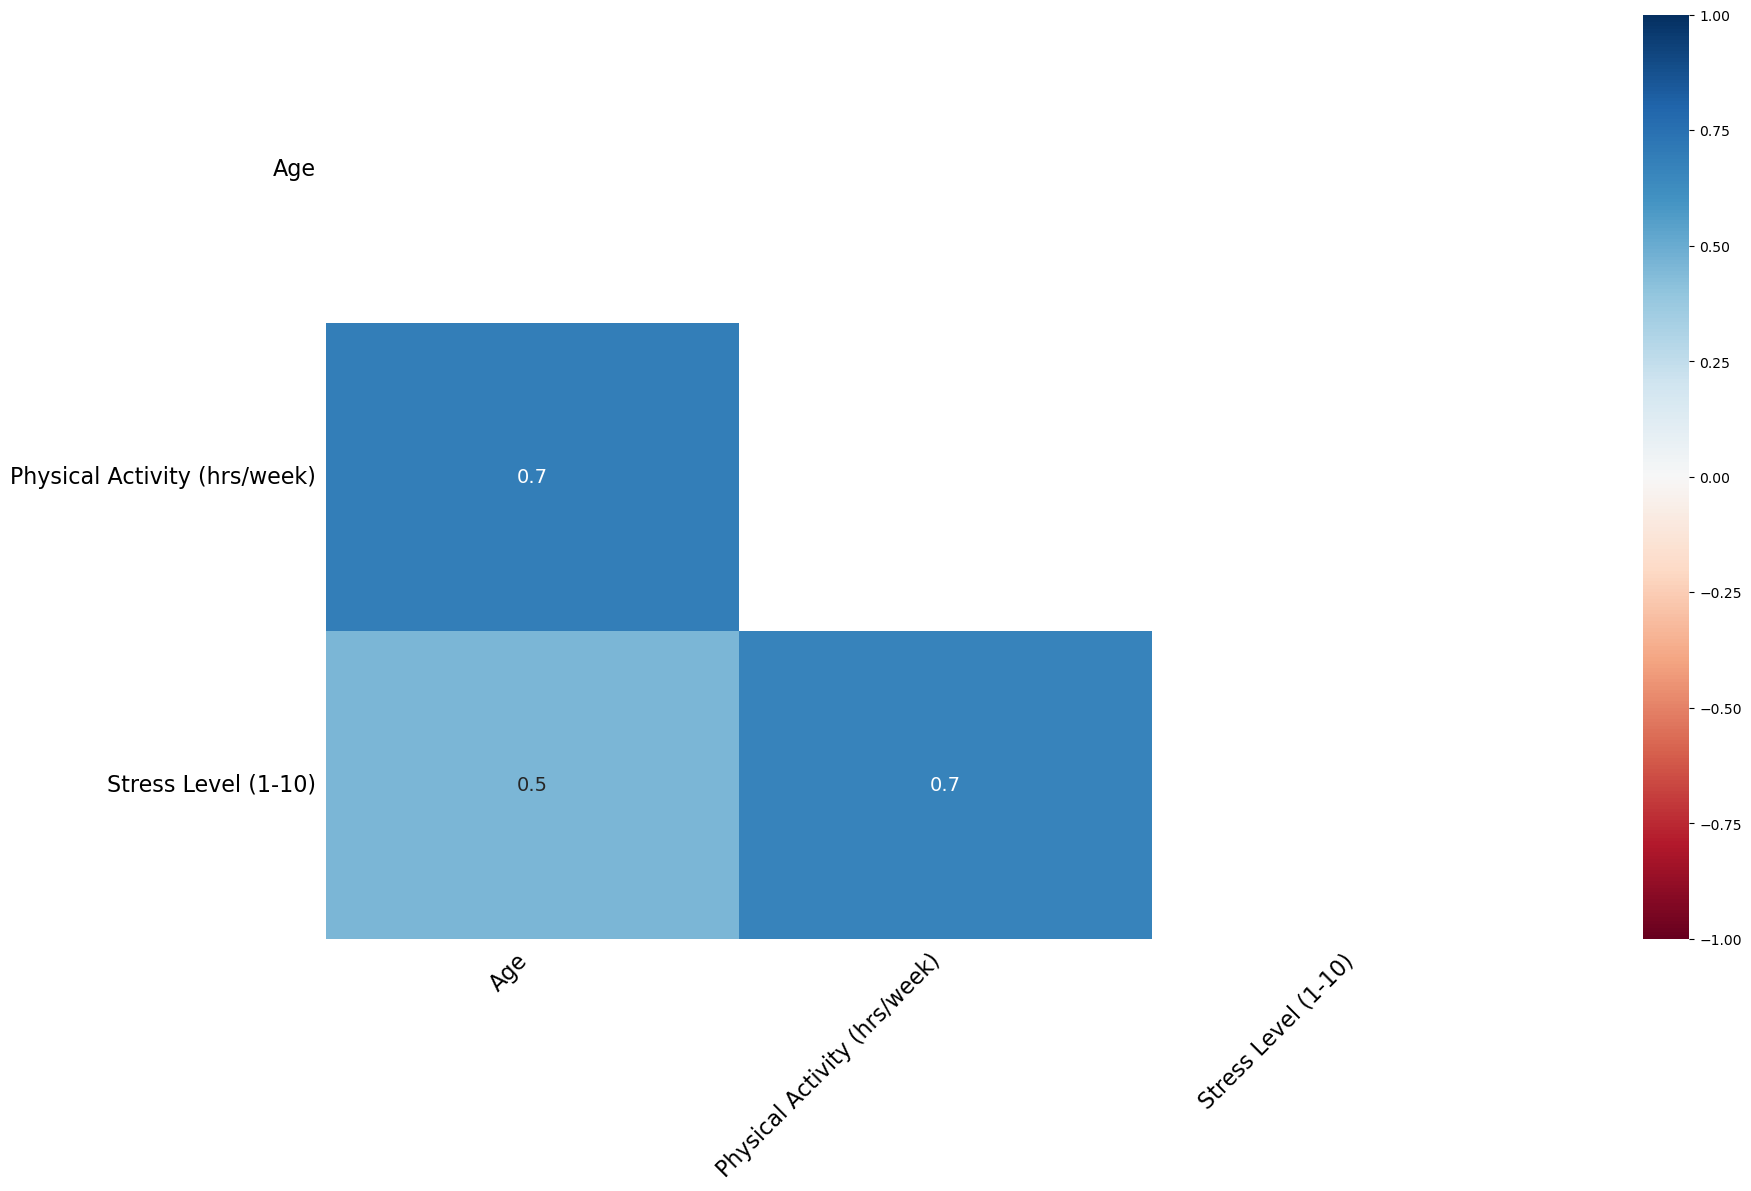

In [10]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)

Check if the dataset is balanced.

In [12]:
# Write your code here. Add as many boxes as you need.
data['Outcome'].value_counts()

Outcome
Deteriorated    171
Improved        170
No Change       159
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [14]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

Patient ID                        0
Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [15]:
percent = data.isnull().sum() / len(data) * 100
percent

Patient ID                       0.0
Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Start Date             0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [17]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [19]:
# Write your code here. Add as many boxes as you need.
data.drop(['Patient ID'],axis=1,inplace=True)
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


In [20]:
imp = SimpleImputer(strategy='mean')
data['Age'] = imp.fit_transform(data[['Age']])


In [21]:
data.sample(15)

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
264,26.000000,Female,Bipolar Disorder,7,7,8,3.0,Benzodiazepines,Mindfulness-Based Therapy,2024-03-18,11,5.0,Deteriorated,5,Excited,68
476,40.000000,Male,Panic Disorder,5,5,4,7.0,Benzodiazepines,Cognitive Behavioral Therapy,2024-02-12,8,8.0,Improved,6,Happy,67
237,18.000000,Male,Bipolar Disorder,9,4,4,7.0,SSRIs,Interpersonal Therapy,2024-03-14,12,6.0,Improved,7,Happy,83
128,31.000000,Male,Bipolar Disorder,6,3,4,9.0,Mood Stabilizers,Cognitive Behavioral Therapy,2024-01-24,16,10.0,Improved,8,Anxious,82
291,30.000000,Female,Panic Disorder,9,7,5,8.0,Anxiolytics,Interpersonal Therapy,2024-02-28,11,5.0,Improved,9,Neutral,86
397,23.000000,Male,Major Depressive Disorder,9,3,5,5.0,Antipsychotics,Interpersonal Therapy,2024-03-25,10,10.0,Improved,10,Stressed,67
338,48.000000,Male,Panic Disorder,7,7,8,3.0,Antidepressants,Mindfulness-Based Therapy,2024-01-07,15,10.0,Deteriorated,5,Excited,76
189,35.000000,Male,Major Depressive Disorder,7,8,8,10.0,SSRIs,Cognitive Behavioral Therapy,2024-02-23,13,7.0,No Change,6,Excited,65
365,40.000000,Male,Major Depressive Disorder,6,5,8,8.0,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,12,10.0,Deteriorated,6,Anxious,90
481,36.000000,Female,Generalized Anxiety,5,3,5,10.0,Antipsychotics,Cognitive Behavioral Therapy,2024-02-22,14,6.0,Improved,5,Stressed,77


In [22]:
data.isnull().sum()

Age                               0
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [23]:
data['Physical Activity (hrs/week)'] = imp.fit_transform(data[['Physical Activity (hrs/week)']])

In [24]:
data.isnull().sum()

Age                               0
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)      0
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [25]:
imp = SimpleImputer(strategy='most_frequent')
data['Stress Level (1-10)'] = imp.fit_transform(data[['Stress Level (1-10)']])

In [26]:
data.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [27]:
def label(data,columns):
    enc = LabelEncoder()
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = enc.fit_transform(data_copy[[c]].astype(str).values.ravel())
    return data_copy

In [28]:
data = label(data=data,columns=['Gender','Diagnosis','Medication','Therapy Type','Outcome','AI-Detected Emotional State'])

In [29]:
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,0,2,10,5,8,5.275556,4,2,2024-01-25,11,9.0,0,7,0,66
1,40.0,0,2,9,5,4,7.000000,1,2,2024-02-27,11,7.0,2,7,4,78
2,55.0,0,2,6,3,4,5.275556,5,3,2024-03-20,14,9.0,0,5,3,62
3,34.0,0,2,6,3,6,5.000000,5,3,2024-03-29,8,8.0,0,10,2,72
4,52.0,1,3,7,6,6,8.000000,2,2,2024-03-18,12,5.0,0,6,2,63


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [31]:
input = data.copy()
input.drop(['Outcome'],axis=1,inplace=True)
input.drop(['Treatment Start Date'],axis=1,inplace=True)

In [32]:
target = data.copy()['Outcome']
target

0      0
1      2
2      0
3      0
4      0
      ..
495    1
496    0
497    0
498    1
499    0
Name: Outcome, Length: 500, dtype: int32

In [33]:
# Write your code here. Add as many boxes as you need.

X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [35]:
# Write your code here. Add as many boxes as you need.

## Model Selection

Choose and train an approriate model for the given task.

In [38]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score
model = XGBClassifier(max_depth=4, min_child_weight=3, n_estimators=100, n_jobs=-1, learning_rate=0.1)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.47      0.34      0.39        41
           1       0.26      0.36      0.30        28
           2       0.34      0.35      0.35        31

    accuracy                           0.35       100
   macro avg       0.36      0.35      0.35       100
weighted avg       0.37      0.35      0.35       100



0.35

In [39]:
tree = DecisionTreeClassifier(max_depth=2)
tree = tree.fit(X_train,Y_train)
y_pred = tree.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.32      0.35        41
           1       0.23      0.54      0.32        28
           2       0.00      0.00      0.00        31

    accuracy                           0.28       100
   macro avg       0.20      0.28      0.22       100
weighted avg       0.22      0.28      0.23       100



C:\Users\kolov\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kolov\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kolov\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Use the trained model to make predictions for the test set.

In [41]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(input, target)

50

In [42]:
# Write your code here. Add as many boxes as you need.
model2 = DecisionTreeClassifier()
param_grid = {
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [3,5,7,10],
    'min_samples_split': [4,8,12]
}


In [43]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model2,param_grid=param_grid,cv=6)

In [44]:
cv.fit(input,target)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [4, 8, 12]})

In [45]:
cv.best_score_

0.3682587492828457

In [46]:
model2 = cv.best_estimator_

In [47]:
y_pred = model2.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.68

Assess the performance of the model by using different classification metrics.

In [50]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [54]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
model = XGBClassifier(max_depth=4, min_child_weight=3, n_estimators=100, n_jobs=-1, learning_rate=0.1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

params = {
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5,7,10],
    'n_estimators': [100,50],
    'learning_rate': [0.1,0.2]
}

cv = GridSearchCV(estimator=model,param_grid=params,cv=5)
cv.fit(X_train, Y_train)
print("Best Parameters:", cv.best_params_)
best_knn = cv.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Accuracy:", classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.43      0.44        21
           1       0.44      0.64      0.52        11
           2       0.36      0.28      0.31        18

    accuracy                           0.42        50
   macro avg       0.41      0.45      0.42        50
weighted avg       0.41      0.42      0.41        50

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100}
Test Accuracy:               precision    recall  f1-score   support

           0       0.38      0.29      0.32        21
           1       0.50      0.73      0.59        11
           2       0.33      0.33      0.33        18

    accuracy                           0.40        50
   macro avg       0.40      0.45      0.42        50
weighted avg       0.39      0.40      0.39        50



## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [60]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [62]:
# Write your code here. Add as many boxes as you need.
